# **Week3 (Classification) 과제**

# Red Wine Quality Classification

## 데이터 소개
  
UCI Machine Learning  
**TASK : Red wine Classification**  
https://archive.ics.uci.edu/dataset/186/wine+quality


csv 파일의 컬럼은 아래와 같습니다.

*   index : 구분자
*   quality : 품질
*   fixed acidity : 산도
*   volatile acidity : 휘발성산
*   citric acid : 시트르산
*   residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
*   chlorides : 염화물
*   free sulfur dioxide : 독립 이산화황
*   total sulfur dioxide : 총 이산화황
*   density : 밀도
*   pH : 수소이온농도
*   sulphates : 황산염
*   alcohol : 도수
*   type : 종류



In [1]:
# 코랩 환경: 구글 드라이브에 코랩을 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# loading data ,your own file path
df = pd.read_csv('/content/drive/MyDrive/KUBIG_2025_WINTER_ML/winequality-red.csv')

In [9]:
# 제공된 csv 데이터 컬럼이 1개로만 되어있는 등 데이터 형식에 문제가 있음

# CSV 파일 읽기 (세미콜론 구분)
df = pd.read_csv("/content/drive/MyDrive/KUBIG_2025_WINTER_ML/winequality-red.csv", sep=";", quotechar='"')

# 데이터 확인
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## EDA(Exploratory Data Analysis)

In [10]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [14]:
print(df.isnull().sum())  # 결측값 확인


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Q1 Data brief review : info() 함수를 통해 알아낼 수 있는 정보를 작성하시오.
(**빈칸 ## 4개를 채우시오**)


답: It turns out that the dataset does not have (**null**) values. The dataset consists of (**1599**) rows and (**12**) columns. The data type of all variables are (**float64**).



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Q2 결측치 확인
결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 정리해주세요.

결측치는 판단에 따라 drop(제거) 할 수 있고, 특정 값으로 채울(대체) 수 있습니다.

데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [15]:
# 결측치 확인
## df의 결측치의 총 합을 확인하는 코드를 작성하며, ##을 채우세요. sum()을 2번 사용하시오.

print("There are {} null values in the dataset".format(df.isnull().sum().sum()))

There are 0 null values in the dataset


### Q3 데이터 분포 확인
각 변수의 데이터 분포가 어떠한지 기술하시오.(맨 위의 세개의 변수에 대해서만 기술)

1. 'fixed_acidity' : 데이터는 오른쪽 꼬리가 긴 분포(Right-Skewed)를 보이며,
대부분의 값이 6-9 사이에 분포하고 있음.
최빈값: 7-8 근처에 위치
일부 데이터는 12~14 이상의 높은 값으로 나타나지만, 빈도는 낮음.
정규 분포를 따르지 않으며, 일부 이상치(outliers) 가능성이 존재.

2. 'volatile_acidity' : 데이터가 정규 분포에 가깝지만, 약간 오른쪽 꼬리가 긴 분포를 가짐.
대부분의 값이 0.3-0.8 사이에 위치하며, 0.4-0.6 근처에 최빈값이 존재.
1.0 이상인 데이터는 매우 드물며, 이상치 가능성이 있음.

3. 'citric_acid' : 데이터가 **강한 왼쪽 치우침(Left-Skewed)**을 보이며, 0 근처에 데이터가 집중됨.
많은 데이터가 0-0.3 사이에 분포하고 있으며, 0 이상의 값은 상대적으로 적음.
0.5 이상부터 데이터 빈도가 급격히 줄어드는 패턴을 보임.
0 값이 많은 이유는 해당 물질이 특정 시료에서는 거의 사용되지 않거나 자연적으로 적게 존재할 가능성이 있음.

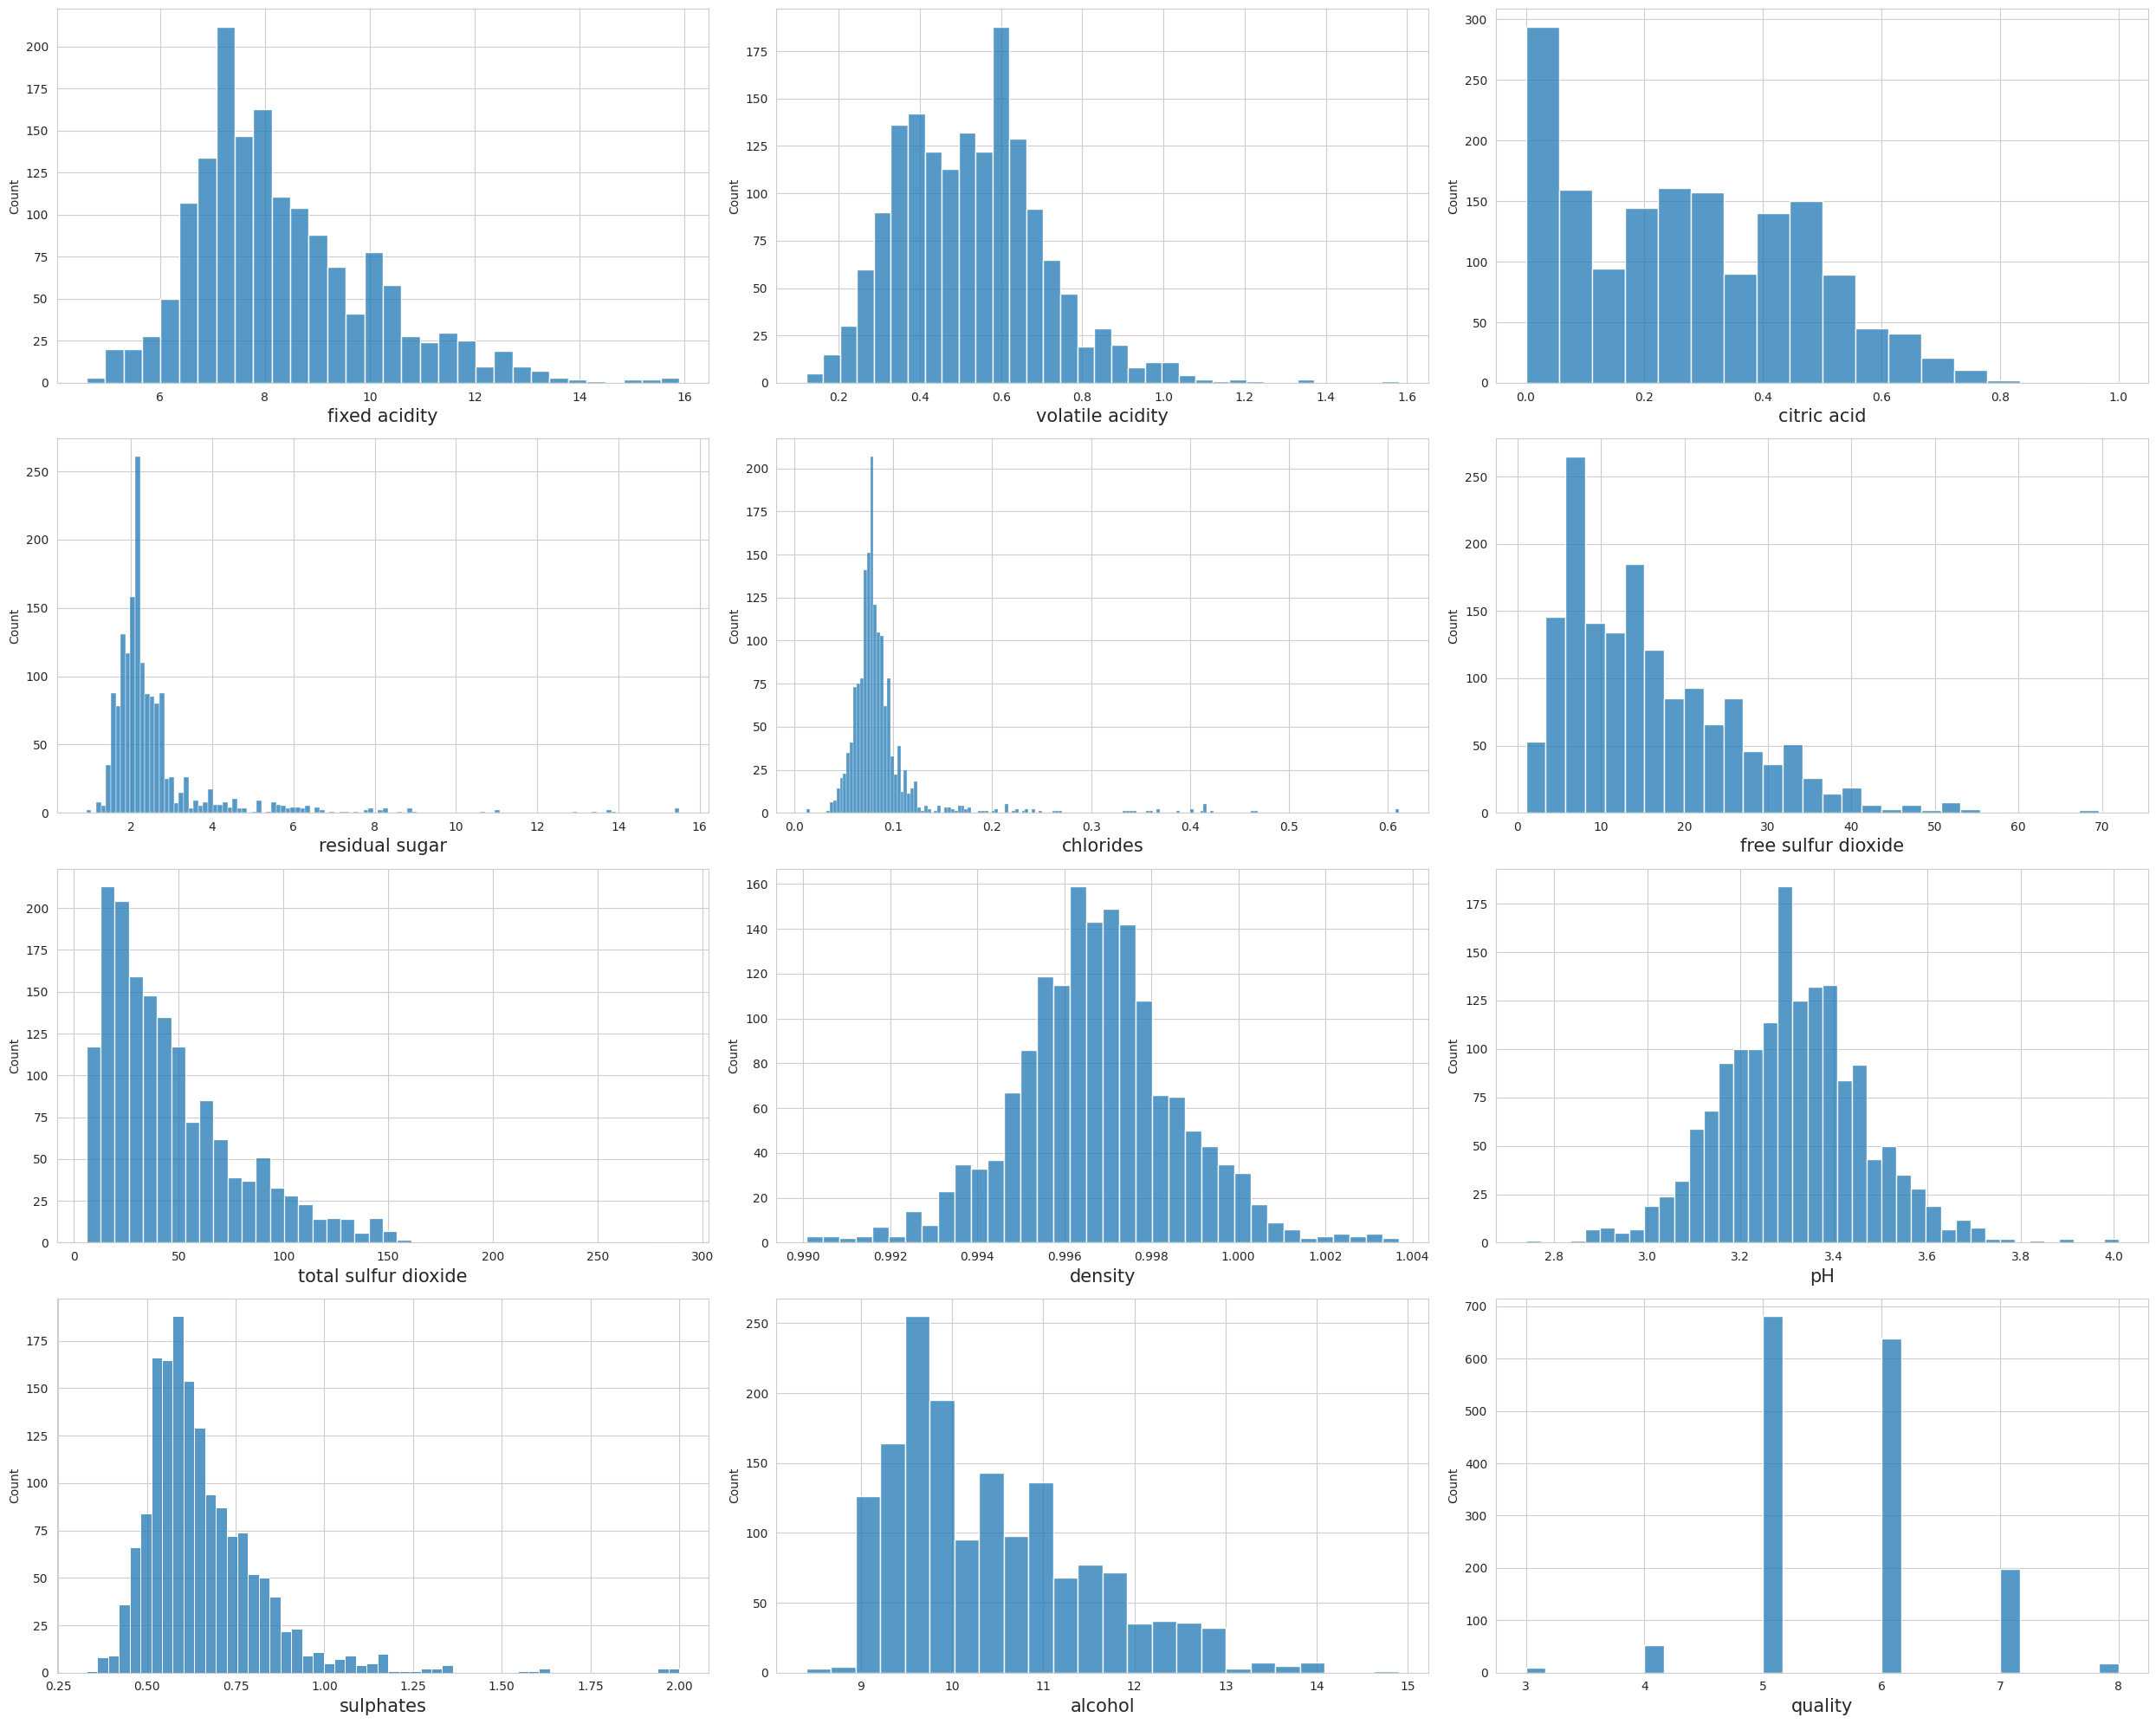

In [16]:
# let's see how data is distributed for every column
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

### Q4. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

더불어 multicollinearity(통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제)에 주목하여, 해당 correlation plot에서 어떤 영향을 주고 있는지 있는지 예를 들어 기술하시오.

답:
alcohol은 품질(quality)과 가장 높은 양의 상관관계를 가지며, volatile acidity는 품질과 음의 상관관계를 가짐.

density와 alcohol 간의 강한 음의 상관관계, free sulfur dioxide와 total sulfur dioxide 간의 강한 양의 상관관계는 다중공선성 문제를 일으킬 가능성이 있음.

이를 해결하기 위해 특정 변수를 제거하거나 차원 축소(PCA) 기법을 활용할 수 있음.


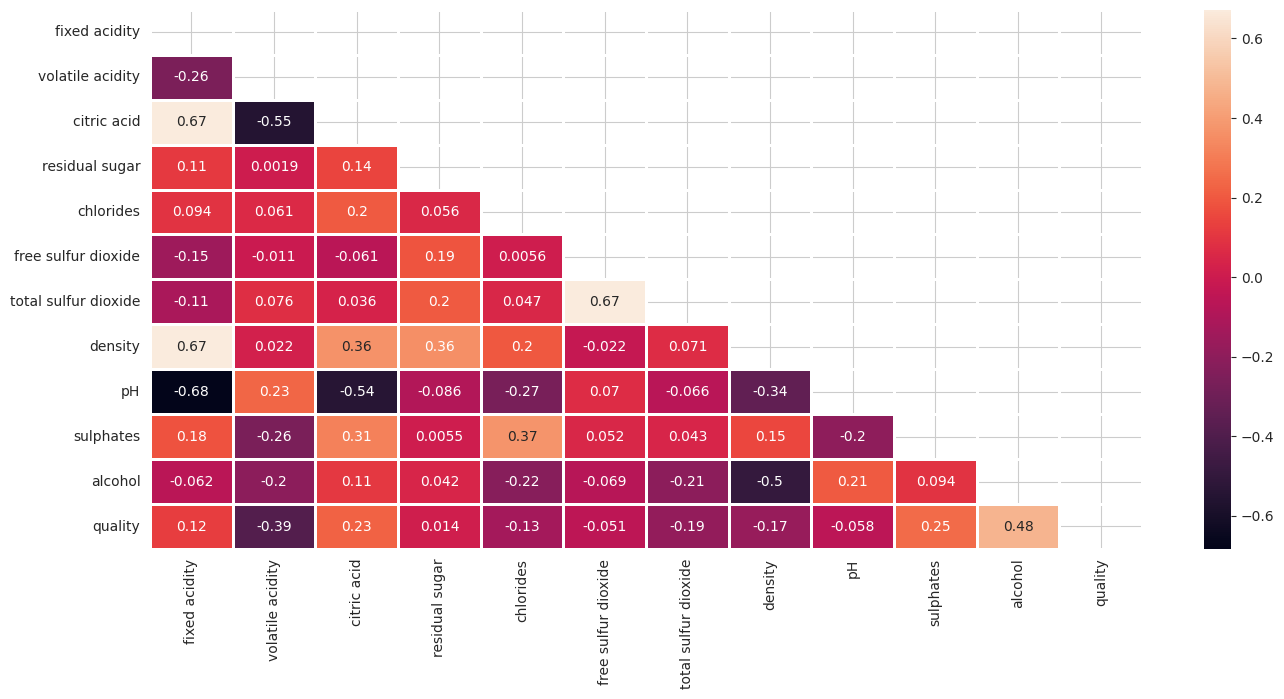

In [17]:
# 상관관계 plot
plt.figure(figsize = (16, 7))

corr = df.corr()
##에 들어갈 코드를 작성하시오.
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()

In [18]:
#Pearson correlation coefficient
import scipy.stats as st
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],df["density"]))
print("Pearson correlation coefficient:", st.pearsonr(df["free sulfur dioxide"],df["total sulfur dioxide"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["citric acid"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.4961797702417016, pvalue=3.9388353399881845e-100)
Pearson correlation coefficient: PearsonRResult(statistic=0.6676664504810215, pvalue=6.40472295468106e-207)
Pearson correlation coefficient: PearsonRResult(statistic=-0.6829781945685314, pvalue=4.063034039843752e-220)
Pearson correlation coefficient: PearsonRResult(statistic=-0.5419041447395097, pvalue=1.007201325911493e-122)
Pearson correlation coefficient: PearsonRResult(statistic=0.6680472921189734, pvalue=3.0747470608605733e-207)


### Q5. quality range를 두 파트로 나눠보세요.
In this dataset quality range is between 3 and 8
We will divide quality range into two parts:



*   High quality wine: 6 - 8
*   Low quality wine: 3 - 5



In [20]:
# quality 값이 6 이상이면 "High"로 변경, 5 이하이면 "Low"로 변경
# lambda란? 간단한 함수를 빠르게 만들 때 사용하는 익명 함수
# lambda x, y: x + y → 입력값 x, y를 받아서 x + y 값을 반환하는 익명 함수를 생성
# def로 만든 함수와 동일한 동작을 하지만, 코드가 더 짧아짐
# apply()를 사용하면 데이터프레임의 각 행에 대해 조건을 적용할 수 있음

df["quality"] = df["quality"].apply(lambda x: "High" if x >= 6 else "Low")

df["quality"]

0        Low
1        Low
2        Low
3       High
4        Low
        ... 
1594     Low
1595    High
1596    High
1597     Low
1598    High
Name: quality, Length: 1599, dtype: object

In [21]:
df.head().style.background_gradient(cmap = "Reds")

### Q6. 종속변수(y,label)은 무엇이 되어야 하나요?


In [22]:
# we select dependent variable (label)
y = df["quality"] ##을 채우시오.

# we select independent variable
x = df.drop("quality", axis = 1) ##을 채우시오.

In [23]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

### Q7. 왜 Standardization(StandardScaler, MinMaxScaler 등) 사용할까요?
두 Scaler의 특징에 대해 조사하고, 보다 적절한 Scaler가 무엇일지 그 이유와 함께 적어주세요.

---
답 : MinMaxScaler가 더 적절함.

이유: 데이터가 정규 분포에 가깝지 않아서.
+ 또는 정규성 검정 만족하지 않아서?

---
✅ 왜 Scaler를 사용해야 할까요?
데이터셋의 각 변수(컬럼)들은 값의 범위(scale)가 서로 다를 수 있습니다.

예를 들어:

fixed_acidity: 4-15
density: 0.98-1.005
chlorides: 0~0.2
total sulfur dioxide: 6-289

이처럼 범위가 서로 다르면, 머신러닝 모델이 특정 범위가 큰 변수에 영향을 많이 받을 수 있습니다.

➡ 따라서 모든 변수의 스케일을 맞춰주어 모델이 더 안정적으로 학습하도록 만드는 과정이 필요합니다.

이를 **정규화(Normalization) 또는 표준화(Standardization)**라고 합니다.



In [27]:
# scaling data
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

### Q7-2. 위의 코드에서, train dataset에 대해서는 fit_transform을, test dataset에 대해서는 transform을 실시하는 이유가 무엇일지 조사해주세요.
답 :
✅ 정리

Train 데이터 (x_train) → fit_transform() 사용

Train 데이터의 최솟값/최댓값을 학습하여 변환 기준을 설정하고, 변환까지 수행.

Test 데이터 (x_test) → transform() 사용

Train 데이터에서 학습된 변환 기준을 그대로 사용하여 변환만 수행.

In [28]:
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]
 [0.36283186 0.44178082 0.22       0.10769231 0.08695652 0.11267606
  0.13235294 0.47629969 0.28346457 0.13173653 0.15384615]
 [0.32743363 0.49657534 0.01       0.1        0.09698997 0.05633803
  0.02941176 0.50688073 0.45669291 0.1497006  0.4       ]]


(1199, 11)
_________________________________________________________________________
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58  

In [29]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

1144    Low
73      Low
446     Low
399     Low
647     Low
Name: quality, dtype: object
(1199,)
___________________________
75       Low
1283    High
408     High
1281    High
1118    High
Name: quality, dtype: object
(400,)


### Q8. Building Classification models

이번 코드에서는 non parametric model; knn을 사용하여 train, test 진행해보았습니다.

아래의 코드 외에도 원하는 한가지 classification 모델(KNN 제외)을 선정하여 아래의 과정을 반복하고, 그 결과를 해석하세요. grid search 과정은 거치지 않고 임의의 파라미터값으로 진행해도 좋습니다.

아래와 같은 Kaggle 코드들도 참고해보세요.  
- https://www.kaggle.com/code/melissamonfared/red-wine-quality-prediction-eda-classification/notebook
- https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification


In [ ]:
## 아래의 과정을 반복하시오.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#KNN

knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [31]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.798172268907563
____________________________________________
best K value: 21 
best weights: distance 
best leaf size: 25


In [32]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=21, weights='distance')

In [33]:
from sklearn.metrics import accuracy_score
y_pred = knn_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred)) #Validation Set Accurac

Accuracy: 0.8025


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.82      0.80      0.81       212
         Low       0.78      0.81      0.79       188

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



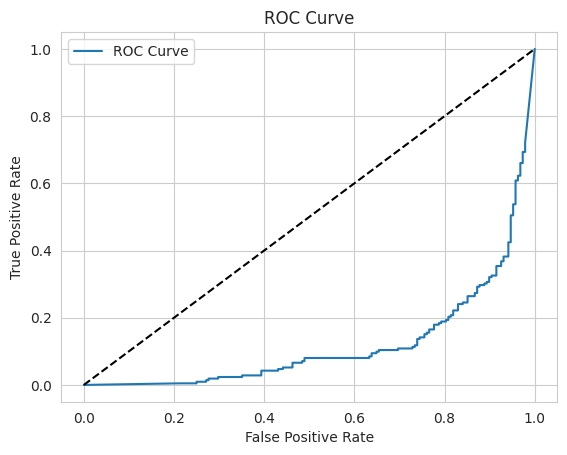

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

# 오류 원인:
# y_test(정답 레이블)가 문자열('High', 'Low')로 되어 있음.
# roc_curve() 및 roc_auc_score() 함수는 **이진 분류(Binary Classification)**일 때 0과 1 또는 -1과 1의 숫자 형식을 요구함.
# 따라서 y_test 값을 숫자로 변환해야 함.

# 'High' → 1, 'Low' → 0으로 변환
# 일반적으로 관심 있는 클래스를 **양성(Positive Class)**으로 설정하는 것이 바람직함
# High 품질 와인을 더 중요하게 예측하고자 한다면, High=1, Low=0**로 설정하는 것이 더 직관적이고, 결과 해석도 명확해짐

y_test_numeric = y_test.map({'Low': 0, 'High': 1})

# Validation Set 에 대한 예측확률 계산
y_prob = knn_model.predict_proba(x_test)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()